# **Analisis Prediksi Hasil Panen Padi di Sumatera Menggunakan Sistem Fuzzy Mamdani dan Sugeno Berdasarkan Curah Hujan dan Kelembapan**

## **Pendahuluan dan Pemaparan Data**
Produksi padi merupakan salah satu sektor penting dalam pertanian di Indonesia, terutama di wilayah Sumatera. Berbagai faktor, seperti curah hujan, kelembapan, dan suhu, dapat memengaruhi hasil panen padi. Untuk memahami hubungan antara faktor-faktor ini dan produksi padi, diperlukan metode analisis yang efektif.

Sistem fuzzy adalah pendekatan yang dapat digunakan untuk menangani ketidakpastian dan variabilitas dalam analisis data. Dalam penelitian ini, kami menerapkan dua jenis sistem fuzzy, yaitu metode Mamdani dan Sugeno, untuk menganalisis data produksi padi di berbagai provinsi di Sumatera.

**Paparan, Statistik, dan Sumber dari dataset yang digunakan**

Dataset ini berasal dari Kaggle dengan judul "Dataset Tanaman Padi Sumatera, Indonesia" yang mencakup informasi historis mengenai produksi padi di berbagai provinsi di Sumatera, Indonesia. Dataset ini mencakup informasi sebagai berikut.

- Provinsi: Nama provinsi tempat produksi padi.
- Tahun: Tahun pengumpulan data.
- Produksi: Jumlah produksi padi dalam ton.
- Luas Panen: Luas lahan yang dipanen untuk padi dalam hektar.
- Curah Hujan: Rata-rata curah hujan dalam mm yang diterima selama periode tertentu.
- Kelembapan: Rata-rata kelembapan (%).
- Suhu Rata-rata: Rata-rata suhu di daerah tersebut (°C).

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 29.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from skfuzzy import control as ctrl

In [ ]:
df = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
df.isnull().sum()

,0
Provinsi,0
Tahun,0
Produksi,0
Luas Panen,0
Curah hujan,0
Kelembapan,0
Suhu rata-rata,0


In [ ]:
df.duplicated().sum()

0

## **Metode dan Eksperimen**

Penelitian ini menggunakan dua metode sistem fuzzy, yaitu Mamdani dan Sugeno, untuk menganalisis data produksi padi berdasarkan variabel-variabel input yang relevan.

**Metode Mamdani**

Metode Mamdani dikembangkan oleh Ebrahim Mamdani pada tahun 1975, menggunakan fungsi keanggotaan untuk mendefinisikan variabel fuzzy dan menghasilkan output berdasarkan aturan fuzzy yang ditetapkan. Dalam pendekatan ini, output berupa nilai fuzzy yang kemudian melalui proses defuzzifikasi menjadi nilai konkret. Langkah-langkah yang diambil adalah sebagai berikut.

1. Definisi Variabel Fuzzy: Variabel input seperti curah hujan dan kelembapan didefinisikan dengan fungsi keanggotaan yang sesuai.
2. Aturan Fuzzy: Beberapa aturan fuzzy dibuat untuk menghubungkan variabel input dengan output (produksi padi).
3. Inferensi: Proses inferensi dilakukan berdasarkan aturan yang telah ditetapkan untuk menghasilkan nilai output fuzzy.
4. Defuzzifikasi: Nilai fuzzy yang dihasilkan kemudian didefuzzifikasi untuk mendapatkan nilai output yang konkret.

**Metode Sugeno**

Metode Sugeno diperkenalkan oleh Takagi dan Sugeno, menghasilkan output sebagai fungsi linear dari variabel input, sehingga memungkinkan untuk mendapatkan hasil yang lebih langsung dan lebih mudah diintegrasikan dengan model matematis lainnya. Dalam metode Sugeno, output tidak melalui proses defuzzifikasi seperti pada Mamdani, melainkan langsung dihitung sebagai kombinasi linear dari input, yang membuat metode ini lebih efisien dalam aplikasi tertentu. Langkah-langkah yang diambil dalam metode Sugeno adalah sebagai berikut.

1. Definisi Variabel Fuzzy: Seperti pada Mamdani, variabel input didefinisikan dengan fungsi keanggotaan.
2. Aturan Fuzzy: Aturan dibuat dengan menentukan hubungan antara input dan output dalam bentuk fungsi linear.
3. Inferensi: Proses inferensi dilakukan untuk menghitung output berdasarkan input yang diberikan.
4. Aggregasi: Nilai output dari setiap aturan kemudian digabungkan untuk menghasilkan output akhir.

## **Hasil dan Analisis**

#### **Fuzzy Mamdani**

#### **Fungsi Keanggotaan**

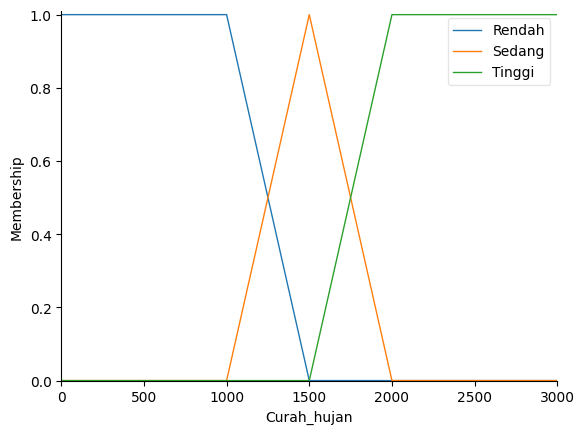

In [ ]:
# Definisi Antecedent untuk Curah Hujan
curah_hujan_range = np.arange(0, 3001, 1)
curah_hujan = ctrl.Antecedent(curah_hujan_range, 'Curah_hujan')

# Definisi fungsi keanggotaan
curah_hujan['Rendah'] = fuzz.trapmf(curah_hujan.universe, [0, 0, 1000, 1500])
curah_hujan['Sedang'] = fuzz.trimf(curah_hujan.universe, [1000, 1500, 2000])
curah_hujan['Tinggi'] = fuzz.trapmf(curah_hujan.universe, [1500, 2000, 3000, 3000])

curah_hujan.view()

Terdapat tiga nilai linguistik pada variabel input `curah_hujan`, yaitu:
1. Rendah
<p> Merepresentasikan curah hujan yang rendah. Fungsi keanggotaannya trapesium (trapmf). Range [0, 0, 1000, 1500], berarti nilai keanggotaan penuh (1.0) adalah dari 0 hingga 1000, fungsi turun dari 1.0 ke 0.0 saat bernilai 1000 hingga 1500, dan keanggotaan sama dengan 0 jika di luar 1500.
2. Sedang
<p> Merepresentasikan curah hujan yang sedang. Fungsi keanggotaannya segitiga (trimf). Range [1000, 1500, 2000], berarti nilai keanggotaan penuh (1.0) adalah di titik 1500, fungsi naik dari 0.0 ke 1.0 saat bernilai 1000 hingga 1500, fungsi turun dari 1.0 ke 0.0 saat bernilai 1500 hingga 2000, dan keanggotaan sama dengan 0 jika di luar range.
3. Tinggi
<p> Merepresentasikan curah hujan yang tinggi. Fungsi keanggotaannya trapesium (trapmf). Range [1500, 2000, 3000, 3000], berarti fungsi naik dari 0.0 ke 1.0 saat bernilai 1500 hingga 2000, nilai keanggotaan penuh (1.0) adalah dari 2000 hingga 3000, dan keanggotaan sama dengan 0 jika di bawah 1500.

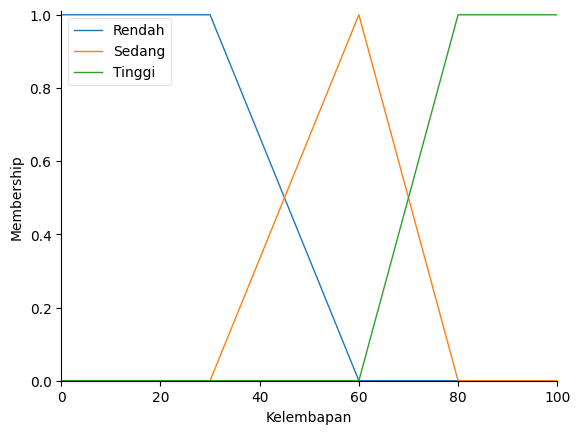

In [ ]:
# Definisi Antecedent untuk Kelembapan
kelembapan = ctrl.Antecedent(np.arange(0, 101, 1), 'Kelembapan')

# Definisi fungsi keanggotaan
kelembapan['Rendah'] = fuzz.trapmf(kelembapan.universe, [0, 0, 30, 60])
kelembapan['Sedang'] = fuzz.trimf(kelembapan.universe, [30, 60, 80])
kelembapan['Tinggi'] = fuzz.trapmf(kelembapan.universe, [60, 80, 100, 100])

kelembapan.view()

Terdapat tiga nilai linguistik pada variabel input `kelembapan`, yaitu:
1. Rendah
<p> Merepresentasikan kelembapan yang rendah. Fungsi keanggotaannya trapesium (trapmf). Range [0, 0, 30, 60], berarti nilai keanggotaan penuh (1.0) adalah dari 0 hingga 30, fungsi menurun ke keanggotaan 0 mulai dari 30 hingga 60.
2. Sedang
<p> Merepresentasikan kelembapan yang sedang. Fungsi keanggotaannya segitiga (trimf). Range [30, 60, 80], berarti nilai keanggotaan penuh (1.0) adalah untuk kelembapan di 60, dan menurun secara simetris dari 30 ke 60 dan dari 60 ke 80.
3. Tinggi
<p>
Merepresentasikan kelembapan yang tinggi. Fungsi keanggotaannya trapesium (trapmf). Range [60, 80, 100, 100], berarti nilai keanggotaan penuh (1.0) adalah untuk kelembapan di antara 80 dan 100, dan menurun ke keanggotaan 0 mulai dari 60 hingga 80.

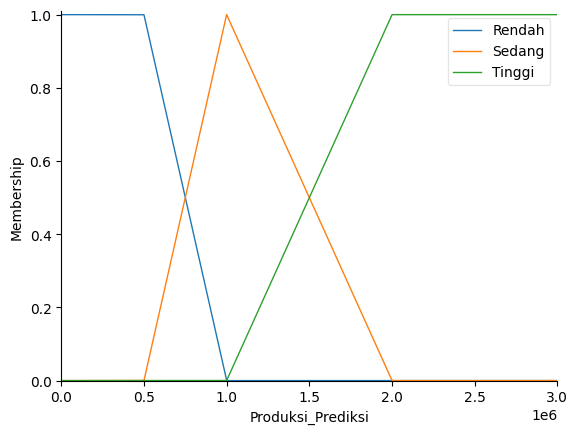

In [ ]:
# Definisi Consequent untuk Produksi
produksi_mamdani = ctrl.Consequent(np.arange(0, 3000001, 1), 'Produksi_Prediksi')

# Definisi fungsi keanggotaan
produksi_mamdani['Rendah'] = fuzz.trapmf(produksi_mamdani.universe, [0, 0, 500000, 1000000])
produksi_mamdani['Sedang'] = fuzz.trimf(produksi_mamdani.universe, [500000, 1000000, 2000000])
produksi_mamdani['Tinggi'] = fuzz.trapmf(produksi_mamdani.universe, [1000000, 2000000, 3000000, 3000000])

produksi_mamdani.view()

Terdapat tiga nilai linguistik pada variabel output `produksi_mamdani`, yaitu:
1. Rendah
<p> Merepresentasikan produksi yang rendah. Fungsi keanggotaannya trapesium (trapmf). Range [0, 0, 500000, 1000000], berarti nilai keanggotaan penuh (1.0) adalah untuk produksi di antara 0 dan 500000, dan menurun ke keanggotaan 0 mulai dari 500000 hingga 1000000.
2. Sedang
<p> Merepresentasikan produksi yang sedang. Fungsi keanggotaannya segitga (trimf). Range [500000, 1000000, 2000000], berarti nilai keanggotaan penuh (1.0) adalah untuk produksi di 1000000, dan menurun secara simetris dari 500000 ke 1000000 dan dari 1000000 ke 2000000.
3. Tinggi
<p> Merepresentasikan produksi yang tinggi. Fungsi keanggotaannya trapesium (trapmf). Range [1000000, 2000000, 3000000, 3000000], berarti nilai keanggotaan penuh (1.0) untuk produksi di antara 2000000 dan 3000000, dan menurun ke keanggotaan 0 mulai dari 1000000 hingga 2000000.

#### **Fuzzy Rules**

Aturan fuzzy berikut dikembangkan untuk menghubungkan variabel input (curah hujan dan kelembapan) dengan output (produksi padi) menggunakan sistem fuzzy Mamdani. Setiap aturan mengacu pada kombinasi level curah hujan dan kelembapan untuk menentukan tingkat produksi padi.

1. Jika curah hujan rendah dan kelembapan rendah, maka produksi padi rendah.
2. Jika curah hujan rendah dan kelembapan sedang, maka produksi padi rendah.
3. Jika curah hujan rendah dan kelembapan tinggi, maka produksi padi sedang.
4. Jika curah hujan sedang dan kelembapan rendah, maka produksi padi rendah.
5. Jika curah hujan sedang dan kelembapan sedang, maka produksi padi sedang.
6. Jika curah hujan sedang dan kelembapan tinggi, maka produksi padi tinggi.
7. Jika curah hujan tinggi dan kelembapan rendah, maka produksi padi sedang.
8. Jika curah hujan tinggi dan kelembapan sedang, maka produksi padi tinggi.
9. Jika curah hujan tinggi dan kelembapan tinggi, maka produksi padi tinggi.


In [ ]:
# Definisi rules
rules = [
    ctrl.Rule(curah_hujan['Rendah'] & kelembapan['Rendah'], produksi_mamdani['Rendah']),
    ctrl.Rule(curah_hujan['Rendah'] & kelembapan['Sedang'], produksi_mamdani['Rendah']),
    ctrl.Rule(curah_hujan['Rendah'] & kelembapan['Tinggi'], produksi_mamdani['Sedang']),
    ctrl.Rule(curah_hujan['Sedang'] & kelembapan['Rendah'], produksi_mamdani['Rendah']),
    ctrl.Rule(curah_hujan['Sedang'] & kelembapan['Sedang'], produksi_mamdani['Sedang']),
    ctrl.Rule(curah_hujan['Sedang'] & kelembapan['Tinggi'], produksi_mamdani['Tinggi']),
    ctrl.Rule(curah_hujan['Tinggi'] & kelembapan['Rendah'], produksi_mamdani['Sedang']),
    ctrl.Rule(curah_hujan['Tinggi'] & kelembapan['Sedang'], produksi_mamdani['Tinggi']),
    ctrl.Rule(curah_hujan['Tinggi'] & kelembapan['Tinggi'], produksi_mamdani['Tinggi']),
]

In [ ]:
# Membuat sistem kontrol
quality_ctrl = ctrl.ControlSystem(rules)
simulation = ctrl.ControlSystemSimulation(quality_ctrl)

#### **Simulasi**

In [ ]:
# Simulasi Fuzzy Mamdani
df_mamdani = df.copy()
results = []

for index, row in df_mamdani.iterrows():
    simulation.input['Curah_hujan'] = row['Curah hujan']
    simulation.input['Kelembapan'] = row['Kelembapan']
    simulation.compute()

    results.append({
        'Provinsi': row['Provinsi'],
        'Curah_Hujan': row['Curah hujan'],
        'Kelembapan': row['Kelembapan'],
        'Produksi_Prediksi': simulation.output['Produksi_Prediksi']
    })

In [ ]:
output_mamdani = pd.DataFrame(results)

#### **Encoding**

In [ ]:
# Fungsi untuk mengkategorikan nilai Produksi
def enc_produksi(val):
    if val < 1000000:
        return "Rendah"
    elif 1000000 <= val < 2000000:
        return "Sedang"
    else:
        return "Tinggi"

# Fungsi untuk mengkategorikan Curah Hujan
def enc_curah_hujan(val):
    if val < 1000:
        return "Rendah"
    elif 1000 <= val < 2000:
        return "Sedang"
    else:
        return "Tinggi"

# Fungsi untuk mengkategorikan Kelembapan
def enc_kelembapan(val):
    if val < 70:
        return "Rendah"
    elif 70 <= val < 85:
        return "Sedang"
    else:
        return "Tinggi"

In [ ]:
output_mamdani['Produksi_Prediksi'] = output_mamdani['Produksi_Prediksi'].apply(enc_produksi)
output_mamdani['Curah_Hujan'] = output_mamdani['Curah_Hujan'].apply(enc_curah_hujan)
output_mamdani['Kelembapan'] = output_mamdani['Kelembapan'].apply(enc_kelembapan)

In [ ]:
# Menampilkan hasil prediksi
output_mamdani.head()

,Provinsi,Curah_Hujan,Kelembapan,Produksi_Prediksi
0,Aceh,Sedang,Sedang,Tinggi
1,Aceh,Sedang,Sedang,Tinggi
2,Aceh,Sedang,Sedang,Tinggi
3,Aceh,Sedang,Sedang,Tinggi
4,Aceh,Sedang,Sedang,Sedang


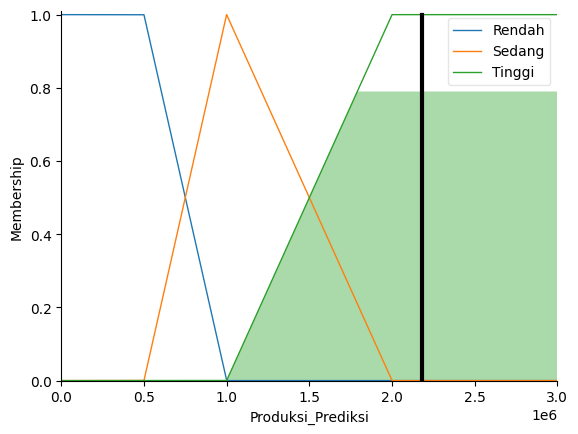

In [ ]:
# Visualisasi hasil
produksi_mamdani.view(sim=simulation)

### **Metode Sugeno**

Dalam konteks dataset produksi padi, variabel input yang digunakan mencakup Curah Hujan, Kelembapan, yang masing-masing memiliki fungsi keanggotaan yang dirancang untuk mencerminkan karakteristiknya. Pada variabel Curah Hujan, fungsi keanggotaan dibagi menjadi tiga kategori: "Rendah," "Sedang," dan "Tinggi." Fungsi curah_hujan_rendah, curah_hujan_sedang, dan curah_hujan_tinggi menerima nilai curah hujan sebagai input dan menghasilkan output berupa nilai crisp yang dihitung berdasarkan rumus linear yang ditentukan untuk masing-masing kategori. Output ini mencerminkan kontribusi curah hujan terhadap hasil panen, memberikan gambaran langsung tentang bagaimana curah hujan dalam kategori tertentu memengaruhi produksi padi.

Untuk variabel Kelembapan, fungsi keanggotaan juga dikelompokkan menjadi tiga kategori: "Rendah," "Sedang," dan "Tinggi." Fungsi kelembapan_rendah, kelembapan_sedang, dan kelembapan_tinggi menghitung output berdasarkan kelembapan yang terukur, dengan rumus linear yang sesuai untuk setiap kategori. Ini memungkinkan analisis yang lebih tepat tentang bagaimana kelembapan berdampak pada hasil panen. Dengan demikian, setiap variabel input dalam metode Sugeno berfungsi untuk menghitung output crisp yang mencerminkan pengaruh langsung dari faktor-faktor tersebut terhadap hasil produksi padi. Proses ini memastikan bahwa setiap keputusan yang diambil berdasarkan analisis fuzzy dapat dipahami dan diterapkan secara praktis dalam konteks pertanian.

In [ ]:
def curah_hujan_rendah(curah_hujan_value):
    return np.clip((1000 - curah_hujan_value) / 1000, 0, 1)

def curah_hujan_sedang(curah_hujan_value):
    return np.clip(1 - abs(curah_hujan_value - 1500) / 500, 0, 1)

def curah_hujan_tinggi(curah_hujan_value):
    return np.clip((curah_hujan_value - 2000) / 1000, 0, 1)

# Metode Sugeno untuk Kelembapan
def kelembapan_rendah(kelembapan_value):
    return np.clip((60 - kelembapan_value) / 60, 0, 1)

def kelembapan_sedang(kelembapan_value):
    return np.clip(1 - abs(kelembapan_value - 75) / 15, 0, 1)

def kelembapan_tinggi(kelembapan_value):
    return np.clip((kelembapan_value - 85) / 15, 0, 1)

#### **Inferensi dan Rules Fuzzy**

Inferensi dalam konteks metode Sugeno adalah proses di mana nilai input. Dalam hal ini Curah Hujan dan Kelembapan, digunakan untuk menghasilkan output melalui serangkaian aturan fuzzy yang telah ditentukan. Setiap aturan fuzzy mengkombinasikan nilai keanggotaan dari dua variabel input untuk menentukan kekuatan dari kondisi yang ada. Misalnya, jika Curah Hujan dikategorikan sebagai "Rendah" dan Kelembapan sebagai "Tinggi," maka aturan ini akan menghasilkan nilai tertentu berdasarkan kombinasi tersebut.

Dalam fungsi `inferensi_sugeno`, sembilan aturan fuzzy didefinisikan, mencakup semua kemungkinan kombinasi kategori dari kedua variabel, yaitu "Rendah," "Sedang," dan "Tinggi." Setiap aturan dihitung dengan mengalikan nilai keanggotaan dari masing-masing kategori, sehingga menghasilkan sembilan nilai yang mewakili kekuatan dari setiap kombinasi kondisi. Output dari setiap aturan kemudian dikalikan dengan nilai output yang dihitung menggunakan fungsi linear, yang memberikan bobot pada Curah Hujan dan Kelembapan. Proses ini memungkinkan untuk menggabungkan semua kontribusi dari aturan fuzzy tersebut, menghasilkan satu nilai output akhir yang mencerminkan keputusan yang diambil berdasarkan kondisi input yang diberikan.

In [ ]:
def inferensi_sugeno(curah_hujan_value, kelembapan_value):
    ch_rendah = curah_hujan_rendah(curah_hujan_value)
    ch_sedang = curah_hujan_sedang(curah_hujan_value)
    ch_tinggi = curah_hujan_tinggi(curah_hujan_value)

    kl_rendah = kelembapan_rendah(kelembapan_value)
    kl_sedang = kelembapan_sedang(kelembapan_value)
    kl_tinggi = kelembapan_tinggi(kelembapan_value)

    # Menghitung setiap aturan
    rule1 = ch_rendah * kl_rendah
    rule2 = ch_rendah * kl_sedang
    rule3 = ch_rendah * kl_tinggi
    rule4 = ch_sedang * kl_rendah
    rule5 = ch_sedang * kl_sedang
    rule6 = ch_sedang * kl_tinggi
    rule7 = ch_tinggi * kl_rendah
    rule8 = ch_tinggi * kl_sedang
    rule9 = ch_tinggi * kl_tinggi

    def linear_output(curah_hujan_value, kelembapan_value):
        return 0.4 * curah_hujan_value + 0.6 * kelembapan_value + 1

    output = (rule1 * linear_output(curah_hujan_value, kelembapan_value) +
              rule2 * linear_output(curah_hujan_value, kelembapan_value) +
              rule3 * linear_output(curah_hujan_value, kelembapan_value) +
              rule4 * linear_output(curah_hujan_value, kelembapan_value) +
              rule5 * linear_output(curah_hujan_value, kelembapan_value) +
              rule6 * linear_output(curah_hujan_value, kelembapan_value) +
              rule7 * linear_output(curah_hujan_value, kelembapan_value) +
              rule8 * linear_output(curah_hujan_value, kelembapan_value) +
              rule9 * linear_output(curah_hujan_value, kelembapan_value))

    return output

In [ ]:
# Menghitung produksi menggunakan metode Sugeno
df_sugeno = df.copy()
results_sugeno = []

for _, row in df_sugeno.iterrows():
    produksi = inferensi_sugeno(row['Curah hujan'], row['Kelembapan'])
    results_sugeno.append({
        'Provinsi': row['Provinsi'],
        'Curah_Hujan': row['Curah hujan'],
        'Kelembapan': row['Kelembapan'],
        'Produksi_Prediksi': produksi
    })

output_sugeno = pd.DataFrame(results_sugeno)

In [ ]:
output_sugeno.head()

,Provinsi,Curah_Hujan,Kelembapan,Produksi_Prediksi
0,Aceh,1627.0,82.00,278.904533
1,Aceh,1521.0,82.12,331.489418
2,Aceh,1476.0,82.72,296.180716
3,Aceh,1557.0,83.00,278.511147
4,Aceh,1339.0,82.46,199.739389


#### **Analisis**

Analisis menunjukkan bahwa Provinsi Aceh memiliki curah hujan dan kelembapan yang "Sedang," yang berimplikasi pada prediksi hasil produksi yang "Tinggi." Data dari metode Sugeno menunjukkan bahwa curah hujan 1627.90 mm dan kelembapan 82.00% dapat menghasilkan prediksi produksi sebesar 278.90 ton. Variabilitas dalam hasil menunjukkan bahwa meskipun curah hujan dan kelembapan serupa, faktor lain seperti teknik pertanian juga memengaruhi hasil. Grafik hasil prediksi memperlihatkan transisi antara kategori rendah, sedang, dan tinggi. Kedua metode, Mamdani dan Sugeno, memberikan wawasan dalam menganalisis pengaruh curah hujan dan kelembapan terhadap produksi padi, dengan Mamdani menawarkan pemahaman kualitatif dan Sugeno menyediakan data kuantitatif. Kombinasi keduanya dapat membantu merancang strategi pertanian yang lebih efektif dan berkelanjutan di Sumatera.

## **Kesimpulan**

Berdasarkan analisis yang dilakukan menggunakan sistem fuzzy Mamdani dan Sugeno untuk memprediksi hasil panen padi di Sumatera, dapat disimpulkan bahwa hasil prediksi produksi padi menunjukkan variasi berdasarkan kondisi curah hujan dan kelembapan. Metode Mamdani cenderung menghasilkan prediksi yang homogen, dengan sebagian besar entri berada pada kategori "Tinggi," meskipun semua entri memiliki status curah hujan dan kelembapan yang sama ("Sedang"). Sebaliknya, output dari metode Sugeno memberikan nilai numerik yang lebih spesifik untuk produksi padi, dengan variasi antara 278.90 ton hingga 331.49 ton, menunjukkan bahwa metode ini dapat memberikan estimasi yang lebih terukur dan detail. Secara keseluruhan, kedua metode menunjukkan potensi dalam menganalisis dan memprediksi hasil produksi padi, namun hasilnya tidak dapat saling menggantikan. Masing-masing metode dapat digunakan secara komplementer untuk memberikan gambaran yang lebih komprehensif mengenai faktor-faktor yang mempengaruhi produksi padi di Sumatera.